## Web Scraping

For the topic of web scraping, I thought of extracting data from a cricket website which will give rankings of the Top20 countries playing cricket. For this project I have considered One Day International (ODI) rankings of the teams. 

In [140]:
# imported required libraries
import requests
import bs4
import pandas as pd
import re
import matplotlib.pyplot as plt

In [141]:
# url of the link from where the table is to be imported
url = 'https://www.icc-cricket.com/rankings/mens/team-rankings/odi'

#Got the text version of the above url
response = requests.get(url).text

Converted the text version into soup object

In [142]:
soup_rankings = bs4.BeautifulSoup(response)
soup_rankings

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="ICC Ranking for ODI teams International Cricket Council" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Ranking for ODI teams International Cricket Council" property="og:title"/>
<meta content="https://www.icc-c

From the soup rankings object found the table containing the statistics ] table. Checked the contents of the table

In [143]:
scorecard_table = soup_rankings.find('table')

scorecard_table.contents

['\n',
 <thead>
 <tr class="table-head">
 <th class="table-head__cell u-text-right">Pos</th>
 <th class="table-head__cell rankings-table__team">
 <span class="u-hide-mobile">Team</span>
 <span class="u-show-mobile">T</span>
 </th>
 <th class="table-head__cell u-center-text">
 <span class="u-hide-mobile">Matches</span>
 <span class="u-show-mobile">M</span>
 </th>
 <th class="table-head__cell u-center-text">
 <span class="u-hide-mobile">Points</span>
 <span class="u-show-mobile">P</span>
 </th>
 <th class="table-head__cell u-text-right rating">
 <span class="u-hide-mobile">Rating</span>
 <span class="u-show-mobile">R</span>
 </th>
 </tr>
 </thead>,
 '\n',
 <tbody>
 <tr class="rankings-block__banner">
 <td class="rankings-block__banner--pos">1</td>
 <td class="rankings-block__banner--team-name">
 <span class="flag-30 rankings-block__banner--flag NZ"></span>
 <span class="u-hide-phablet">New Zealand</span>
 <span class="u-show-phablet">NZ</span>
 </td>
 <td class="rankings-block__banner--m

From the scorecard_table contents and by inspecting the html file we understand that the rows of the table are in between \<tr>. So tried to find all the rows that is in between \<tr>

In [144]:
scorecard_table_rows = scorecard_table.find_all('tr')
print(scorecard_table_rows[:50])

[<tr class="table-head">
<th class="table-head__cell u-text-right">Pos</th>
<th class="table-head__cell rankings-table__team">
<span class="u-hide-mobile">Team</span>
<span class="u-show-mobile">T</span>
</th>
<th class="table-head__cell u-center-text">
<span class="u-hide-mobile">Matches</span>
<span class="u-show-mobile">M</span>
</th>
<th class="table-head__cell u-center-text">
<span class="u-hide-mobile">Points</span>
<span class="u-show-mobile">P</span>
</th>
<th class="table-head__cell u-text-right rating">
<span class="u-hide-mobile">Rating</span>
<span class="u-show-mobile">R</span>
</th>
</tr>, <tr class="rankings-block__banner">
<td class="rankings-block__banner--pos">1</td>
<td class="rankings-block__banner--team-name">
<span class="flag-30 rankings-block__banner--flag NZ"></span>
<span class="u-hide-phablet">New Zealand</span>
<span class="u-show-phablet">NZ</span>
</td>
<td class="rankings-block__banner--matches">17</td>
<td class="rankings-block__banner--points">2,054</td

First row of the all the rows in scorecard_table_rows is the header row which is at index 0. Extracted 1st row from scorecard_table_rows and named it as header_row

In [145]:
header_row = scorecard_table_rows[0]
header_row

<tr class="table-head">
<th class="table-head__cell u-text-right">Pos</th>
<th class="table-head__cell rankings-table__team">
<span class="u-hide-mobile">Team</span>
<span class="u-show-mobile">T</span>
</th>
<th class="table-head__cell u-center-text">
<span class="u-hide-mobile">Matches</span>
<span class="u-show-mobile">M</span>
</th>
<th class="table-head__cell u-center-text">
<span class="u-hide-mobile">Points</span>
<span class="u-show-mobile">P</span>
</th>
<th class="table-head__cell u-text-right rating">
<span class="u-hide-mobile">Rating</span>
<span class="u-show-mobile">R</span>
</th>
</tr>

To extract header of individual columns we found all the values in between \<th>. Used strip and regex pattern to get the right column names

In [146]:
ths = header_row.find_all("th")
ths

[<th class="table-head__cell u-text-right">Pos</th>,
 <th class="table-head__cell rankings-table__team">
 <span class="u-hide-mobile">Team</span>
 <span class="u-show-mobile">T</span>
 </th>,
 <th class="table-head__cell u-center-text">
 <span class="u-hide-mobile">Matches</span>
 <span class="u-show-mobile">M</span>
 </th>,
 <th class="table-head__cell u-center-text">
 <span class="u-hide-mobile">Points</span>
 <span class="u-show-mobile">P</span>
 </th>,
 <th class="table-head__cell u-text-right rating">
 <span class="u-hide-mobile">Rating</span>
 <span class="u-show-mobile">R</span>
 </th>]

In [147]:
header = [th.text.strip() for th in ths]
header = [re.sub(r'\n[A-z]','', file) for file in header]
print(header)
print(len(header))

['Pos', 'Team', 'Matches', 'Points', 'Rating']
5


Now to extract all the rows of the table. Created an empty list and added all rows in between\<td>. Again, used strip and regex function to get the appropriate format.

In [148]:
ranking_data_rows = []
for tr in scorecard_table_rows:
    tds = tr.find_all('td')
    row = [td.text.strip() for td in tds]
    row = [re.sub(r'\n[A-Z]\w+','', t) for t in row]
    row = [re.sub(r',','', t) for t in row]
    if row:
        ranking_data_rows.append(row)

ranking_data_rows

[['1', 'New Zealand', '17', '2054', '121'],
 ['2', 'Australia', '25', '2945', '118'],
 ['3', 'India', '29', '3344', '115'],
 ['4', 'England', '27', '3100', '115'],
 ['5', 'South Africa', '20', '2137', '107'],
 ['6', 'Pakistan', '24', '2323', '97'],
 ['7', 'Bangladesh', '27', '2438', '90'],
 ['8', 'West Indies', '27', '2222', '82'],
 ['9', 'Sri Lanka', '24', '1876', '78'],
 ['10', 'Afghanistan', '17', '1054', '62'],
 ['11', 'Netherlands', '7', '336', '48'],
 ['12', 'Ireland', '21', '897', '43'],
 ['13', 'Zimbabwe', '15', '588', '39'],
 ['14', 'Scotland', '7', '258', '37'],
 ['15', 'Oman', '7', '240', '34'],
 ['16', 'Nepal', '5', '119', '24'],
 ['17', 'UAE', '9', '190', '21'],
 ['18', 'Namibia', '6', '97', '16'],
 ['19', 'United States', '8', '93', '12'],
 ['20', 'Papua New Guinea', '5', '0', '0']]

Created a dataframe with column names extracted from header list

In [149]:
cricket_stats_odi_df = pd.DataFrame(ranking_data_rows, columns = header)
cricket_stats_odi_df

,Pos,Team,Matches,Points,Rating
0,1,New Zealand,17,2054,121
1,2,Australia,25,2945,118
2,3,India,29,3344,115
3,4,England,27,3100,115
4,5,South Africa,20,2137,107
5,6,Pakistan,24,2323,97
6,7,Bangladesh,27,2438,90
7,8,West Indies,27,2222,82
8,9,Sri Lanka,24,1876,78
9,10,Afghanistan,17,1054,62


Analyzed the dataframe using the info function

In [150]:
cricket_stats_odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pos      20 non-null     object
 1   Team     20 non-null     object
 2   Matches  20 non-null     object
 3   Points   20 non-null     object
 4   Rating   20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


On checking the data frame, we understand that the columns Matches, Points and Ratings are imported as string. Converted these variables as integer and float columns

In [151]:
# data type conversion 
cricket_stats_odi_df['Matches']=  cricket_stats_odi_df['Matches'].astype(int)
cricket_stats_odi_df['Rating'] = cricket_stats_odi_df['Rating'].astype(int)
cricket_stats_odi_df['Points'] = cricket_stats_odi_df['Points'].astype(float)

While reading about web scrapping on cricket I learnt that python also has specific package like `espncricinfo` which can help us analyze many more statistics  related to cricket.Installed the package and imported require libraries to learn more about this library

In [152]:
# pip install python-espncricinfo

imported summary and match library from the package

In [153]:
from espncricinfo.summary import Summary
from espncricinfo.match import Match

In [154]:
Match('1249875').description

'ICC World Test Championship, Final: India v New Zealand at Southampton, Jun 18-23, 2021'

Using the espncricinfo library we can exhibit many more statics like individual player stats, team scores, specific match statistics.

Using Python we can also get the live scores of a match of our interest. For this example I am considering a live match score

In [155]:
url1 = 'https://www.icc-cricket.com/match/23531#scorecard'
   
response1 = requests.get(url1).text
soup_score = bs4.BeautifulSoup(response1)
scorecard = soup_score.select('div.js-scorebox')

for i in scorecard:
    print(i.getText().rstrip())



WTC
ICC World Test ChampionshipFinal


Hampshire Bowl, Southampton, England


    India 2nd Innings Complete

New Zealand 2nd Innings to come next




India -
    
            217 & 170
    
73 ov
CRR: 2.32






New Zealand -
    
            249


Using the ratings data from data frame `cricket_stats_odi_df`, created some interactive data visualization  techniques. Used plotly and interactive widgets to understand a basic data trend.

In [156]:
# imported required libraries
import ipywidgets as widgets

In [157]:
#creates a list which contains all the columns of the data frame cricket_stats_odi_df. Removed columns which will not be helpful in dropdown
data_cols =cricket_stats_odi_df.columns.to_list()
cols_removed = cricket_stats_odi_df.iloc[:,0:2]
data_cols= [col for col in data_cols if col not in cols_removed]

In [158]:
# created dropdown using column names 
pick_col = widgets.Dropdown(
    options=data_cols,
    description='Column',)

In [165]:
def create_bar(col):
      
    plt.barh(range(len(cricket_stats_odi_df[col])), cricket_stats_odi_df[col], color="brown")
    plt.yticks(range(len(cricket_stats_odi_df[col])), cricket_stats_odi_df['Team'])
    plt.title("Team Rankings");

In [166]:
widgets.interact(create_bar, col = pick_col, Title = "Team Rankings by {}".format(pick_col));

interactive(children=(Dropdown(description='Column', options=('Matches', 'Points', 'Rating'), value='Matches')…

### Plotly

Used plotly library to create interactive plots with cricket ratings data

In [167]:
#  imported required librarie
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

Created a scatter plot to understand the relation between the number of matches played by a team to the points scored

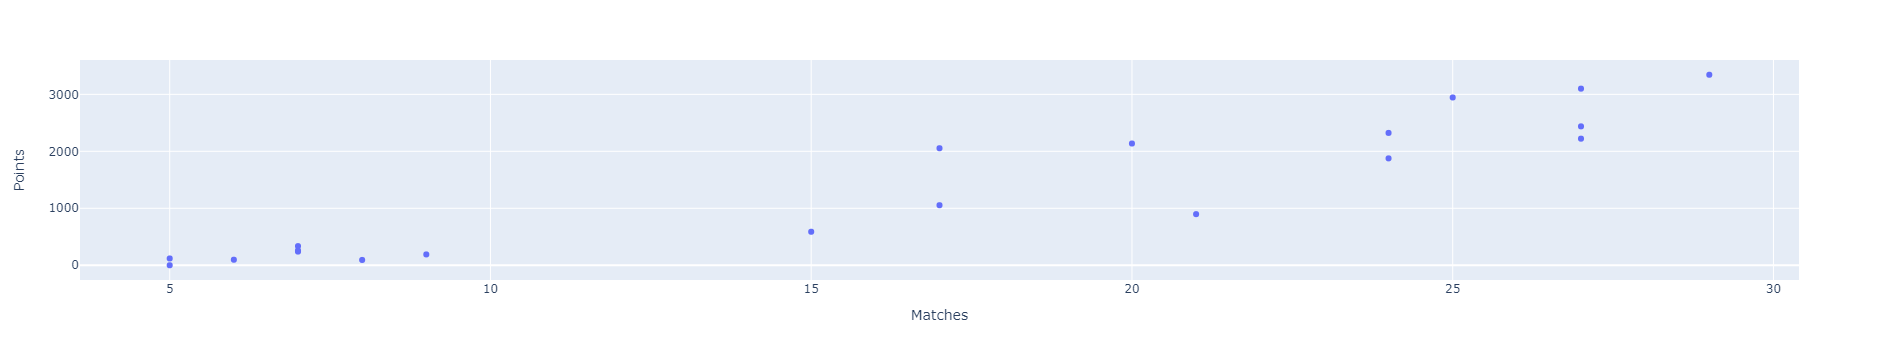

In [168]:
px.scatter( cricket_stats_odi_df , x="Matches", y="Points")

From the graph above we can say that the more number of matches played by a team, more are the points acquired. The relation between the two varibales is not linear but we can see an increasing pattern of points with increase in number of matches played

Plotted soeme bar charts to analyse the perfoermance of the teams

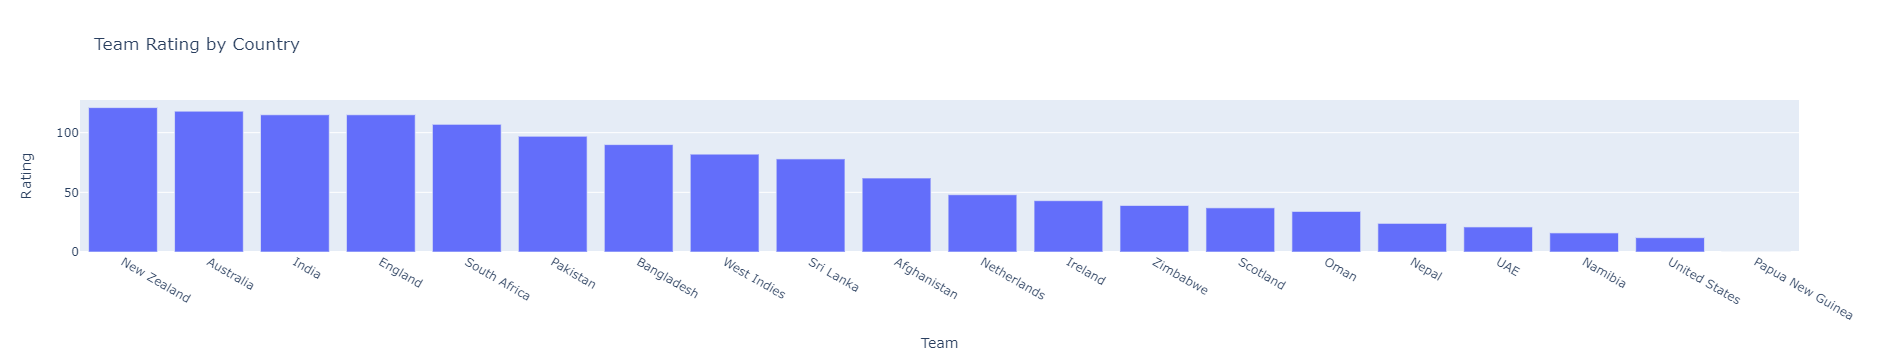

In [169]:
px.bar(cricket_stats_odi_df, x='Team', y='Rating',title = "Team Rating by Country" ,hover_data=['Points'])

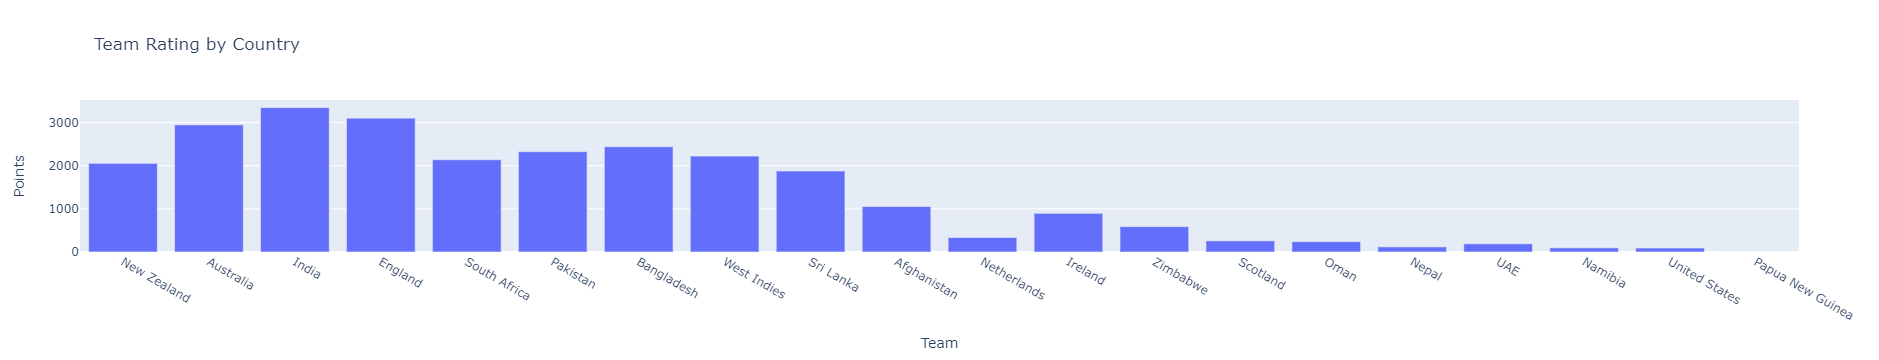

In [170]:
px.bar(cricket_stats_odi_df, x='Team', y='Points',title = "Team Rating by Country" ,hover_data=['Matches'])

From the graphs above we can say that Team NewZealand has a better rating when compared to other teams, but India stands at the top for number of points acquired by a team. There are many points that are considered while calculating the final ratings of the team like their scores in a match, if the game was away or home and the margin with which the opposition was conquered.

### Conclusion - 

In this notebook I have extracted data from a html link, imported it into a dataframe and then analyzed the data using data visualization techniques.